In [3]:
# Import numerical libraries.  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

#Librairies
import time
import torch
import random

#Raccourcis utilisé
import torch.nn as nn
import torch.utils.data as data_utils
import pandas as pd

# Importation des données

In [4]:
dfl = pd.read_csv('LeaderboardSet2.csv',sep=';')
dfl=dfl.drop('Odor',axis=1)
List=[]
for i in range(len(dfl)):
    if dfl.iat[i,1] == 'replicate ':
        List.append(i)
for i in range(len(List)):
    dfl = dfl.drop(List[i])        
print("Nombre de ligne repliqué que l'on supprime:", len(List))
del List
dfl=dfl.drop('Replicate',axis=1)
dfl = dfl.dropna()
dfl

Nombre de ligne repliqué que l'on supprime: 0


,Compound Identifier,Intensity,Dilution,subject,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,FRUIT,FISH,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,243,low,1/100000,1,22,78.0,0.0,76.0,73.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,243,high,1/1000,1,73,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0
2,243,low,1/100000,2,39,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,8.0
4,243,low,1/100000,3,13,70.0,0.0,52.0,0.0,0.0,...,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0
6,243,low,1/100000,4,12,87.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,16220109,high,1/10,47,97,40.0,0.0,0.0,0.0,0.0,...,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0
6758,16220109,low,1/1000,48,5,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6759,16220109,high,1/10,48,94,33.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,7.0
6760,16220109,low,1/1000,49,32,47.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dft = pd.read_csv('TrainSet.csv',sep=';')
dft=dft.drop('Odor',axis=1)
List=[]
for i in range(len(dft)):
    if dft.iat[i,1] == 'replicate ':
        List.append(i)
for i in range(len(List)):
    dft = dft.drop(List[i])        
print("Nombre de ligne repliqué que l'on supprime:", len(List))
del List
dft=dft.drop('Replicate',axis=1)
dft = dft.dropna()
dft

Nombre de ligne repliqué que l'on supprime: 1960


,Compound Identifier,Intensity,Dilution,subject,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,FRUIT,FISH,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,low,"1/1,000",1,7,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,high,1/10,1,37,60.0,0.0,72.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,low,"1/1,000",2,55,89.0,0.0,33.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,126,high,1/10,2,64,71.0,0.0,9.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,126,low,"1/1,000",3,89,68.0,0.0,62.0,0.0,0.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35079,6999977,high,"1/1,000",47,42,77.0,56.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35080,6999977,low,"1/100,000",48,0,72.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35081,6999977,high,"1/1,000",48,22,96.0,0.0,58.0,7.0,0.0,...,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
35082,6999977,low,"1/100,000",49,72,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,9.0,0.0,2.0,0.0,0.0,0.0,3.0


In [6]:
df= pd.concat([dft, dfl])
df = df.sort_values(by = ['Compound Identifier','subject'])
del dft
del dfl

# Numérisation des colonne Intensity et Dilution

In [7]:
#Colonne Intenisty
for i in range(len(df)):
    if df.iat[i,1] == 'low ':
        df.iat[i,1] = 0
    if df.iat[i,1] == 'high ':
        df.iat[i,1] = 1
    if df.iat[i,1] == 'low':
        df.iat[i,1] = 0
    if df.iat[i,1] == 'high':
        df.iat[i,1] = 1  

In [8]:
#Colonne Dilution
for i in range(len(df)):
    if df.iat[i,2] == '1/10':
        df.iat[i,2] = 0
    if df.iat[i,2] == '1/1000':
        df.iat[i,2] = 1
    if df.iat[i,2] == '1/1,000 ':
        df.iat[i,2] = 1
    if df.iat[i,2] == '1/100000':
        df.iat[i,2] = 2
    if df.iat[i,2] == '1/100,000 ':
        df.iat[i,2] = 2 
    if df.iat[i,2] == '1/10,000,000 ':
        df.iat[i,2] = 3

# Labelisation des Valeurs à prédire

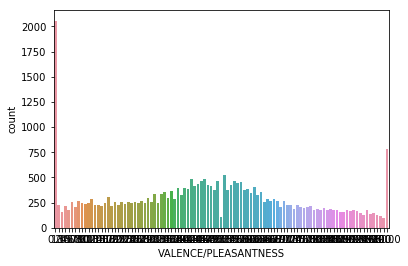

In [9]:
sn.countplot(df['VALENCE/PLEASANTNESS'])

In [10]:
#Colonnes sentation Olfactive
for i in range(len(df)):
    for j in range (21):
        if df.iat[i,j+4] == 0:
            df.iat[i,j+4] = 0
        elif df.iat[i,j+4] == 100:
            df.iat[i,j+4] = 10
        else :
            df.iat[i,j+4] = (df.iat[i,j+4] // 10) +1

### Test de la création d'une colone dec pour les 19 descripteurs

Fusionner les 19 descriptuers en une seule colonne est une fausse piste.
On ajoute à chaque valeur une puissance de 10, exemple:  
8900000000000002000  
Donne 8 pour chemical  
9 pour Flower  
2 pour fish et 0 pour tout les autres

In [32]:
#dec
dec=[]
for i in range(len(df)):
    a=0
    for j in range (19):
        b= df.iat[i,j+6]
        if b==0:
            a+= 0*10**j
        else:
            a+= b*10**j
    dec.append(a)

In [34]:
dec=list(set(dec))
len(dec)

15547

Il y a 15547 combinaisons des 19 descripteurs présentent dans le dataset, ceux qui est bien trop pour un apprentissage.

### Binaire  
à utliser à la place de la fonction au dessus

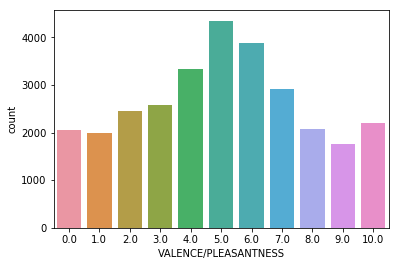

In [41]:
sn.countplot(df['VALENCE/PLEASANTNESS'])

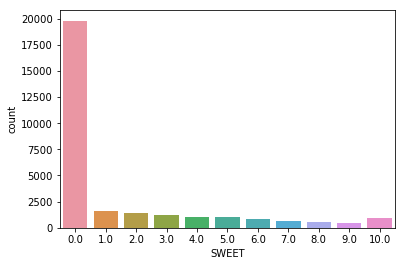

In [42]:
sn.countplot(df['SWEET'])

In [44]:
df # Toutes les données des sensation olfactives perçus

,Compound Identifier,Intensity,Dilution,subject,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,FRUIT,FISH,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,0,1,1,1,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,1,0,1,4,7.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,0,1,2,6,9.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,126,1,0,2,7,8.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,126,0,1,3,9,7.0,0.0,7.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29552,16220109,1,0,47,10,5.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
29553,16220109,0,1,48,1,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29554,16220109,1,0,48,10,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
29555,16220109,0,1,49,4,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.to_csv('Senteur Dataset Dream 1.csv',sep=';')
df = pd.read_csv('Senteur Dataset Dream 1.csv',sep=';')
df = df.drop('Unnamed: 0',axis=1)
df.to_csv('Senteur Dataset Dream 1.csv',sep=';')

# Valeurs moléculaire

In [84]:
mdf = pd.read_csv('molecular_descriptors_data2.csv',sep=';')
mdf

,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,126,93.1,122.13,8.142,10.010,15.305,10.193,16.664,0.667,1.020,...,0,0,0,0,0,0,0,0,0,0
1,176,31.0,60.06,7.508,4.483,8.422,4.432,9.249,0.560,1.053,...,0,0,0,0,0,0,0,0,0,0
2,177,10.3,44.06,6.294,3.768,7.095,3.977,8.040,0.538,1.014,...,0,0,0,0,0,0,0,0,0,0
3,180,26.3,58.09,5.809,5.295,9.978,5.739,11.455,0.530,0.998,...,0,0,0,0,0,0,0,0,0,0
4,196,114.0,146.16,7.308,11.493,20.727,11.625,22.914,0.575,1.036,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,6114390,344.0,282.36,7.240,24.886,38.934,26.216,43.365,0.638,0.998,...,0,0,1,0,0,0,1,0,1,0
472,6429333,152.0,146.20,6.962,13.349,20.745,14.261,23.285,0.636,0.988,...,0,0,0,0,0,0,0,0,1,0
473,6999977,101.0,146.21,6.092,12.832,24.167,13.693,27.535,0.535,1.007,...,0,0,0,0,0,0,0,0,0,0
474,10857465,322.0,236.44,5.254,24.090,43.698,27.114,51.022,0.535,0.971,...,0,0,1,0,1,0,1,0,1,0


In [85]:
mdf = mdf.dropna()
print(" On drop les Molécules 807, 887, 962, 6505, et 8122.",
      "La 962 est présente dans le dataframe test.")
print("Ces molécules présente de nombreux NaN dans leurs données moléculaires.")

 On drop les Molécules 807, 887, 962, 6505, et 8122. La 962 est présente dans le dataframe test.
Ces molécules présente de nombreux NaN dans leurs données moléculaires.


In [86]:
mdf.to_csv('Mol_descriptor.csv',sep=';')
mdf = pd.read_csv('Mol_descriptor.csv',sep=';')
mdf = mdf.drop('Unnamed: 0',axis=1)
mdf.to_csv('Mol_descriptor.csv',sep=';')

In [87]:
mdf

,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,126,93.1,122.13,8.142,10.010,15.305,10.193,16.664,0.667,1.020,...,0,0,0,0,0,0,0,0,0,0
1,176,31.0,60.06,7.508,4.483,8.422,4.432,9.249,0.560,1.053,...,0,0,0,0,0,0,0,0,0,0
2,177,10.3,44.06,6.294,3.768,7.095,3.977,8.040,0.538,1.014,...,0,0,0,0,0,0,0,0,0,0
3,180,26.3,58.09,5.809,5.295,9.978,5.739,11.455,0.530,0.998,...,0,0,0,0,0,0,0,0,0,0
4,196,114.0,146.16,7.308,11.493,20.727,11.625,22.914,0.575,1.036,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,6114390,344.0,282.36,7.240,24.886,38.934,26.216,43.365,0.638,0.998,...,0,0,1,0,0,0,1,0,1,0
467,6429333,152.0,146.20,6.962,13.349,20.745,14.261,23.285,0.636,0.988,...,0,0,0,0,0,0,0,0,1,0
468,6999977,101.0,146.21,6.092,12.832,24.167,13.693,27.535,0.535,1.007,...,0,0,0,0,0,0,0,0,0,0
469,10857465,322.0,236.44,5.254,24.090,43.698,27.114,51.022,0.535,0.971,...,0,0,1,0,1,0,1,0,1,0


In [88]:
print("On supprime les données olfactives liées à ces molécules:")

#Cmdf = mdf[['CID']]
Cmdf = pd.DataFrame(mdf[['CID']],columns = ['CID'])
List= []
for i in range (len(df)):
    a=0
    for j in range (len(Cmdf)):
        if Cmdf.iat[j,0] == df.iat[i,0]:
            a+=1
    if a == 0:
        List.append(i)
print('Nombre de ligne concernée:', len(List))
for i in range(len(List)):
    df = df.drop(List[i])

On supprime les données olfactives liées à ces molécules:
Nombre de ligne concernée: 0


In [89]:
Liste=[]
Xcolumns= mdf.columns
for j in range (len(Xcolumns)):
    a=0
    for i in range (len(mdf)):
        if mdf.iat[i,j] != 0 :
            a+=1
    if a == 0:
        Liste.append(j)
print('Nombre de colonne sans importance:',len(Liste))
print('On les supprime.')
for j in range(len(Liste)):
    mdf.drop([Xcolumns[Liste[j]]], axis = 1, inplace = True)

Nombre de colonne sans importance: 1790
On les supprime.


In [90]:
#Pour ne pas modifier la colonne CID, on navigue sur les colonnes de 1 à 3117 
#en ajoutant +1 à j qui va de 0 à 3116.
#Code pour la racine cubique, permet une meilleure normalisation

for j in range (3079):
    for i in range(len(mdf)):
        if mdf.iat[i,j+1] < 0:
            mdf.iat[i,j+1] = ((mdf.iat[i,j+1]**(2))**(1/2))**(1/3)
            mdf.iat[i,j+1] = (mdf.iat[i,j+1])*1000//1/1000
            mdf.iat[i,j+1] *= (-1)
        else :
            mdf.iat[i,j+1] = ((mdf.iat[i,j+1]**(2))**(1/2))**(1/3)
            mdf.iat[i,j+1] = (mdf.iat[i,j+1])*1000//1/1000

In [94]:
dataX = np.float32(mdf.values)
Xcolumns = mdf.columns
sc = StandardScaler()
dataX = sc.fit_transform(dataX)

<Figure size 432x288 with 0 Axes>

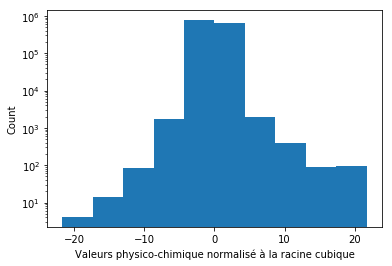

<Figure size 432x288 with 0 Axes>

In [95]:
plt.hist(dataX.ravel())
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Valeurs physico-chimique normalisé à la racine cubique')
plt.figure()

In [93]:
mdf

,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Depressant-80,Depressant-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,126,4.532278,4.961437,2.011764,2.155153,2.482815,2.168207,2.554229,0.873726,1.006623,...,0,0,0,0,0,0,0,0,0,0
1,176,3.141381,3.916172,1.958130,1.648882,2.034566,1.642605,2.099093,0.824257,1.017363,...,0,0,0,0,0,0,0,0,0,0
2,177,2.175767,3.531952,1.846328,1.556098,1.921546,1.584353,2.003328,0.813319,1.004645,...,0,0,0,0,0,0,0,0,0,0
3,180,2.973847,3.872878,1.797631,1.742965,2.152854,1.790381,2.254231,0.809267,0.999333,...,0,0,0,0,0,0,0,0,0,0
4,196,4.848808,5.267560,1.940586,2.256721,2.746917,2.265327,2.840318,0.831552,1.011859,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,6114390,7.006796,6.560461,1.934548,2.919566,3.389297,2.970677,3.513283,0.860875,0.999333,...,1,0,1,0,0,0,1,0,1,0
467,6429333,5.336803,5.268041,1.909463,2.372191,2.747712,2.425027,2.855565,0.859975,0.995984,...,0,0,0,0,0,0,0,0,1,0
468,6999977,4.657010,5.268161,1.826361,2.341162,2.891174,2.392395,3.019685,0.811804,1.002328,...,0,0,0,0,0,0,0,0,0,0
469,10857465,6.854124,6.183585,1.738455,2.888100,3.522253,3.004216,3.708963,0.811804,0.990238,...,1,0,1,0,1,0,1,0,1,0


### Alignement des index des deux dataframes

In [22]:
df.to_csv('Senteur Dataset Dream 1.csv',sep=';')
df = pd.read_csv('Senteur Dataset Dream 1.csv',sep=';')
df = df.drop('Unnamed: 0',axis=1)
df.to_csv('Senteur Dataset Dream 1.csv',sep=';')

In [23]:
mdf.to_csv('Mol_descriptor.csv',sep=';')
mdf = pd.read_csv('Mol_descriptor.csv',sep=';')
mdf = mdf.drop('Unnamed: 0',axis=1)
mdf.to_csv('Mol_descriptor.csv',sep=';')

## Création du Dataset Train

Le but de ce dataset est d'aligner autant de lignes de descripteurs moléculaires qu'il y a de ligne de sensation olfactive perçus. Soit 30812.  
On traite la création de ces données molécules par molécules.

In [ ]:
mdf

In [ ]:
df

In [24]:
Cdf = df[['Compound Identifier']]
colo = mdf.columns
tdf= pd.DataFrame(columns = colo)
for j in range(len(mdf)):
    inter = pd.DataFrame(columns = colo)
    for i in range(len(Cdf)):
        if mdf.iat[j,0] == Cdf.iat[i,0] :
            b= mdf.iloc[j:j+1]
            inter = pd.concat([inter, b])
    tdf = pd.concat([tdf, inter])
    print('Chargement:',j+1,'/471;          Molécule:',mdf.iat[j,0],'              Nombre de ligne:',len(inter))
    
del b
del inter
del Cdf
del colo

Chargement: 1 /471;          Molécule: 126               Nombre de ligne: 80
Chargement: 2 /471;          Molécule: 176               Nombre de ligne: 42
Chargement: 3 /471;          Molécule: 177               Nombre de ligne: 66
Chargement: 4 /471;          Molécule: 180               Nombre de ligne: 0
Chargement: 5 /471;          Molécule: 196               Nombre de ligne: 55
Chargement: 6 /471;          Molécule: 239               Nombre de ligne: 66
Chargement: 7 /471;          Molécule: 240               Nombre de ligne: 74
Chargement: 8 /471;          Molécule: 241               Nombre de ligne: 42
Chargement: 9 /471;          Molécule: 243               Nombre de ligne: 56
Chargement: 10 /471;          Molécule: 244               Nombre de ligne: 91
Chargement: 11 /471;          Molécule: 261               Nombre de ligne: 88
Chargement: 12 /471;          Molécule: 262               Nombre de ligne: 0
Chargement: 13 /471;          Molécule: 263               Nombre de ligne: 

Chargement: 106 /471;          Molécule: 7147               Nombre de ligne: 47
Chargement: 107 /471;          Molécule: 7150               Nombre de ligne: 45
Chargement: 108 /471;          Molécule: 7151               Nombre de ligne: 87
Chargement: 109 /471;          Molécule: 7165               Nombre de ligne: 69
Chargement: 110 /471;          Molécule: 7194               Nombre de ligne: 55
Chargement: 111 /471;          Molécule: 7288               Nombre de ligne: 70
Chargement: 112 /471;          Molécule: 7302               Nombre de ligne: 0
Chargement: 113 /471;          Molécule: 7335               Nombre de ligne: 82
Chargement: 114 /471;          Molécule: 7341               Nombre de ligne: 51
Chargement: 115 /471;          Molécule: 7360               Nombre de ligne: 47
Chargement: 116 /471;          Molécule: 7361               Nombre de ligne: 71
Chargement: 117 /471;          Molécule: 7409               Nombre de ligne: 54
Chargement: 118 /471;          Molécule: 

Chargement: 209 /471;          Molécule: 8908               Nombre de ligne: 57
Chargement: 210 /471;          Molécule: 8914               Nombre de ligne: 77
Chargement: 211 /471;          Molécule: 8918               Nombre de ligne: 82
Chargement: 212 /471;          Molécule: 9012               Nombre de ligne: 0
Chargement: 213 /471;          Molécule: 9016               Nombre de ligne: 41
Chargement: 214 /471;          Molécule: 9024               Nombre de ligne: 75
Chargement: 215 /471;          Molécule: 9025               Nombre de ligne: 80
Chargement: 216 /471;          Molécule: 9256               Nombre de ligne: 50
Chargement: 217 /471;          Molécule: 9261               Nombre de ligne: 58
Chargement: 218 /471;          Molécule: 9589               Nombre de ligne: 73
Chargement: 219 /471;          Molécule: 9609               Nombre de ligne: 63
Chargement: 220 /471;          Molécule: 9862               Nombre de ligne: 79
Chargement: 221 /471;          Molécule: 

Chargement: 311 /471;          Molécule: 24834               Nombre de ligne: 82
Chargement: 312 /471;          Molécule: 26331               Nombre de ligne: 80
Chargement: 313 /471;          Molécule: 27440               Nombre de ligne: 0
Chargement: 314 /471;          Molécule: 27457               Nombre de ligne: 96
Chargement: 315 /471;          Molécule: 27458               Nombre de ligne: 73
Chargement: 316 /471;          Molécule: 31209               Nombre de ligne: 90
Chargement: 317 /471;          Molécule: 31210               Nombre de ligne: 71
Chargement: 318 /471;          Molécule: 31219               Nombre de ligne: 0
Chargement: 319 /471;          Molécule: 31225               Nombre de ligne: 76
Chargement: 320 /471;          Molécule: 31234               Nombre de ligne: 80
Chargement: 321 /471;          Molécule: 31244               Nombre de ligne: 89
Chargement: 322 /471;          Molécule: 31246               Nombre de ligne: 88
Chargement: 323 /471;         

Chargement: 413 /471;          Molécule: 444683               Nombre de ligne: 54
Chargement: 414 /471;          Molécule: 444972               Nombre de ligne: 60
Chargement: 415 /471;          Molécule: 519539               Nombre de ligne: 93
Chargement: 416 /471;          Molécule: 520108               Nombre de ligne: 95
Chargement: 417 /471;          Molécule: 520191               Nombre de ligne: 80
Chargement: 418 /471;          Molécule: 520296               Nombre de ligne: 59
Chargement: 419 /471;          Molécule: 521238               Nombre de ligne: 84
Chargement: 420 /471;          Molécule: 526618               Nombre de ligne: 75
Chargement: 421 /471;          Molécule: 556940               Nombre de ligne: 91
Chargement: 422 /471;          Molécule: 565690               Nombre de ligne: 58
Chargement: 423 /471;          Molécule: 595928               Nombre de ligne: 52
Chargement: 424 /471;          Molécule: 637563               Nombre de ligne: 77
Chargement: 425 

In [25]:
tdf

,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Depressant-80,Depressant-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,...,0,0,0,0,0,0,0,0,0,0
0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,...,0,0,0,0,0,0,0,0,0,0
0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,...,0,0,0,0,0,0,0,0,0,0
0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,...,0,0,0,0,0,0,0,0,0,0
0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,...,0,0,0,0,1,0,1,0,1,0
470,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,...,0,0,0,0,1,0,1,0,1,0
470,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,...,0,0,0,0,1,0,1,0,1,0
470,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,...,0,0,0,0,1,0,1,0,1,0


#### Enregistrement des Dataset crées

In [ ]:
df.to_csv('Senteur Dataset Dream 1.csv',sep=';')
mdf.to_csv('Mol_descriptor.csv',sep=';')
tdf.to_csv('brouillon.csv',sep=';')

In [ ]:
tdf = pd.read_csv('brouillon.csv',sep=';')
tdf = tdf.drop('Unnamed: 0',axis=1)
tdf.to_csv('Molecular Dataset Dream 1.csv',sep=';')